<h1>Pre-procesamiento y limpieza de Datos</h1>

In [1]:
'''Importar la libreria para la realizacion de este laboratorio.'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
'''Obtener el Dataset para mostrar todo su contenido.'''
df = pd.read_csv("data_act_01.csv",sep=";")
df.sample(10)

,CrimeId,OriginalCrimeTypeName,OffenseDate,CallTime,CallDateTime,Disposition,Address,City,State,AgencyId,Range,AddressType
1335,160922351,Juvenile Disturbance,2016-04-01T00:00:00,15:53,2016-04-01T15:53:00,GOA,300 Block Of La Grande Av,San Francisco,CA,1,NaN,Common Location
3339,160931809,Vandalism,2016-04-02T00:00:00,13:22,2016-04-02T13:22:00,HAN,600 Block Of Precita Av,San Francisco,CA,1,NaN,Premise Address
6679,160943678,500e,2016-04-03T00:00:00,23:02,2016-04-03T23:02:00,GOA,0 Block Of Edinburgh St,San Francisco,CA,1,NaN,Premise Address
9179,160960614,Traffic Stop,2016-04-05T00:00:00,7:49,2016-04-05T07:49:00,ADV,Mariposa St/indiana St,San Francisco,CA,1,NaN,Intersection
483,160920669,Rep,2016-04-01T00:00:00,7:46,2016-04-01T07:46:00,REP,2300 Block Of 16th Av,San Francisco,CA,1,NaN,Premise Address
4356,160933716,Passing Call,2016-04-02T00:00:00,22:28,2016-04-02T22:28:00,HAN,400 Block Of 13th St,Treasure Isla,CA,1,NaN,Premise Address
2481,160930261,Noise Nuisance,2016-04-02T00:00:00,1:44,2016-04-02T01:44:00,GOA,Ofarrell St/larkin St,San Francisco,CA,1,NaN,Intersection
3032,160931293,Report,2016-04-02T00:00:00,10:57,2016-04-02T10:57:00,ADV,900 Block Of Market St,San Francisco,CA,1,NaN,Premise Address
5827,160942218,Passing Call,2016-04-03T00:00:00,14:58,2016-04-03T14:58:00,HAN,Polk St/willow St,San Francisco,CA,1,NaN,Intersection
5885,160942320,Audible Alarm,2016-04-03T00:00:00,15:28,2016-04-03T15:28:00,PAS,1000 Block Of Mission St,San Francisco,CA,1,NaN,Premise Address


In [3]:
'''Observar el tipo de variables que contiene el dataframe'''
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10051 entries, 0 to 10050
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CrimeId                10051 non-null  int64  
 1   OriginalCrimeTypeName  10051 non-null  object 
 2   OffenseDate            10051 non-null  object 
 3   CallTime               10051 non-null  object 
 4   CallDateTime           10051 non-null  object 
 5   Disposition            10051 non-null  object 
 6   Address                10051 non-null  object 
 7   City                   9730 non-null   object 
 8   State                  10048 non-null  object 
 9   AgencyId               10051 non-null  object 
 10  Range                  0 non-null      float64
 11  AddressType            10051 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 942.4+ KB


In [4]:
'''Detectar valores nulos y su conteo'''
df.isnull().sum()

CrimeId                      0
OriginalCrimeTypeName        0
OffenseDate                  0
CallTime                     0
CallDateTime                 0
Disposition                  0
Address                      0
City                       321
State                        3
AgencyId                     0
Range                    10051
AddressType                  0
dtype: int64

In [5]:
'''Observar la cantidad de filas en el dataset.'''
df.shape

(10051, 12)

# Primer error (Columnas Innecesarias)
Anlizando el dataset existen columnas que no aportan informacion valiosa para el desarrollo o analisis posterior de que sea util para la materia de mineria de datos. Es por esto que se decidio eliminar la columna Range y la columna CallDateTime. La columna Range no tenia ningun valor. Y la columna CallDateTime tenia informacion redundante. Corregimos el error de esta forma.

In [6]:
'''Eliminar la columna "Range" ya que observando los registros se observa que no posee ningun dato.'''
df = df.drop(['Range'], axis=1)
df.sample(10)

,CrimeId,OriginalCrimeTypeName,OffenseDate,CallTime,CallDateTime,Disposition,Address,City,State,AgencyId,AddressType
6277,160942987,Suspicious Person,2016-04-03T00:00:00,18:49,2016-04-03T18:49:00,CIT,Shotwell St/18th St,San Francisco,CA,1,Intersection
9647,160962528,519 Poss,2016-04-05T00:00:00,15:45,2016-04-05T15:45:00,HAN,Eureka St/market St,San Francisco,CA,1,Intersection
6043,160942591,Passing Call,2016-04-03T00:00:00,16:52,2016-04-03T16:52:00,HAN,600 Blk Linden St,San Francisco,CA,1,Geo-Override
5072,160940918,Sw,2016-04-03T00:00:00,8:15,2016-04-03T08:15:00,CIT,500 Block Of 35th Av,San Francisco,CA,1,Premise Address
1237,160922168,Meet W/citizen,2016-04-01T00:00:00,15:10,2016-04-01T15:10:00,HAN,Hermann St/church St,San Francisco,CA,1,Intersection
858,160921348,Trespasser,2016-04-01T00:00:00,11:20,2016-04-01T11:20:00,HAN,100 Block Of Jefferson St,San Francisco,CA,1,Premise Address
8815,160953736,Sw,2016-04-04T00:00:00,21:15,2016-04-04T21:15:00,CIT,600 Block Of Athens St,San Francisco,CA,1,Premise Address
6232,160942911,Muni Inspection,2016-04-03T00:00:00,18:21,2016-04-03T18:21:00,Not recorded,300 Block Of Market St,San Francisco,CA,1,Common Location
9742,160962883,22500e,2016-04-05T00:00:00,17:06,2016-04-05T17:06:00,CIT,2300 Block Of 40th Av,San Francisco,CA,1,Premise Address
6190,160942843,500f,2016-04-03T00:00:00,18:03,2016-04-03T18:03:00,ADV,300 Block Of Leland Av,San Francisco,CA,1,Premise Address


In [7]:
'''Eliminar la columna "CallDateTime" ya que observando 
los registros es la misma informacion ya presentada en 
otras columas.'''
df = df.drop(['CallDateTime'], axis=1)
df.sample(10)

,CrimeId,OriginalCrimeTypeName,OffenseDate,CallTime,Disposition,Address,City,State,AgencyId,AddressType
9007,160954153,Suspicious Person,2016-04-04T00:00:00,23:36,ADV,1400 Block Of Haight St,San Francisco,CA,1,Premise Address
10009,160964070,916,2016-04-05T00:00:00,22:37,ADV,Bryant St/17th St,San Francisco,CA,1,Intersection
608,160920872,Traffic Stop,2016-04-01T00:00:00,8:50,ADV,Bay St/leavenworth St,San Francisco,CA,1,Intersection
1150,160921998,Traffic Stop,2016-04-01T00:00:00,14:22,ARR,Ulloa St/wawona St,San Francisco,CA,1,Intersection
5587,160941792,Homeless Complaint,2016-04-03T00:00:00,12:54,GOA,0 Block Of Mccormick St,San Francisco,CA,1,Premise Address
9281,160960965,Traffic Stop,2016-04-05T00:00:00,9:26,ADV,Mission St/cesar Chavez St,San Francisco,CA,1,Intersection
9415,160961523,500e/rz,2016-04-05T00:00:00,11:48,NOM,2700 Block Of Pine St,San Francisco,CA,1,Premise Address
2452,160930221,Suspicious Person,2016-04-02T00:00:00,1:23,GOA,300 Block Of Shipley St,San Francisco,CA,1,Premise Address
5051,160940882,Poss,2016-04-03T00:00:00,7:55,REP,2400 Block Of San Bruno Av,San Francisco,CA,1,Premise Address
3429,160931960,650,2016-04-02T00:00:00,14:06,REP,3200 Block Of 16th St,San Francisco,CA,1,Premise Address


# Segundo error (Valores duplicados)

In [8]:
'''Conteo de ids duplicados, y verificacion de los mismos.'''
print("CrimeId: ",df['CrimeId'].duplicated().sum())
df[df.duplicated(subset=['CrimeId'],keep=False)];

CrimeId:  4


Como se aprecia, existen 4 registros repetidos los cuales analizamos y se tratan de 2 IDs que se registran en 3 ocasiones cada uno, de modo que el sistema asigna 4 repeticiones. Vamos a corregir este error.

In [9]:
'''Realizamos una función la cual crea un set de la lista
de los datos duplicados existentes en la columna CrimeId'''
duplic = df.index[df.duplicated(subset=['CrimeId'],keep=False)].tolist()
maximo = df['CrimeId'].max()

In [10]:
'''Mediante el uso de un ciclo for el cual debe 
recorrer la lista de duplicados. A cada duplicado
se le asigna un nuevo Id, el cual es el valor 
maximo de los IDs aumentado en 1.'''
for r in duplic:
  maximo += 1
  df['CrimeId'].iloc[r] = maximo

C:\Users\User\AppData\Local\Temp\ipykernel_17456\2075909998.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CrimeId'].iloc[r] = maximo


In [11]:
'''Verificamos si se cambiaron los datos'''
dup = df[df['CrimeId'].duplicated(keep=False)]['CrimeId'].tolist()
dup

[]

# Tercer error (Rellenar valores faltantes)

In [12]:
'''Se reemplaza los valores vacios que existen 
en las columnas City por valores en Cero, 
ya que al tener valores nulos pueden generar
errores adicionales en este contexto.'''

df[['City', 'State']] = df[['City','State']].fillna(value=0)
df

,CrimeId,OriginalCrimeTypeName,OffenseDate,CallTime,Disposition,Address,City,State,AgencyId,AddressType
0,160903280,Assault / Battery,2016-03-30T00:00:00,18:42,REP,100 Block Of Chilton Av,San Francisco,CA,1,Premise Address
1,160912272,Homeless Complaint,2016-03-31T00:00:00,15:31,GOA,2300 Block Of Market St,San Francisco,CA,1,Premise Address
2,160912590,Susp Info,2016-03-31T00:00:00,16:49,GOA,2300 Block Of Market St,San Francisco,CA,1,Premise Address
3,160912801,Report,2016-03-31T00:00:00,17:38,GOA,500 Block Of 7th St,San Francisco,CA,1,Premise Address
4,160912811,594,2016-03-31T00:00:00,17:42,REP,Beale St/bryant St,San Francisco,CA,1,Intersection
...,...,...,...,...,...,...,...,...,...,...
10046,160964210,Well Being Check,2016-04-05T00:00:00,23:38,GOA,Hollister Av/hawes St,San Francisco,CA,1,Intersection
10047,160964216,Traffic Stop,2016-04-05T00:00:00,23:43,ADV,California St/mason St,San Francisco,CA,1,Intersection
10048,160964227,Traffic Stop,2016-04-05T00:00:00,23:48,CIT,Rosella Ct/onondaga Av,San Francisco,CA,1,Intersection
10049,160964229,Passing Call,2016-04-05T00:00:00,23:48,Not recorded,0 Blk Herbst Rd,San Francisco,CA,1,Geo-Override


In [13]:
'''Verificar la redundancia de datos en la columna de City'''
df.groupby('City').count()

,CrimeId,OriginalCrimeTypeName,OffenseDate,CallTime,Disposition,Address,State,AgencyId,AddressType
City,,,,,,,,,
0,321,321,321,321,321,321,321,321,321
S,1,1,1,1,1,1,1,1,1
Brisbane,1,1,1,1,1,1,1,1,1
Daly City,5,5,5,5,5,5,5,5,5
Presidio,3,3,3,3,3,3,3,3,3
SAN FRANCISCO,1,1,1,1,1,1,1,1,1
San Francisco,9665,9665,9665,9665,9665,9665,9665,9665,9665
Treasure Isla,51,51,51,51,51,51,51,51,51
Yerba Buena,3,3,3,3,3,3,3,3,3


<h1>Analisis</h1>
Observamos que existian 321 valores nulos que fueron reemplazados por 0 Analizando las direccciones de estas filas, nos podemos dar cuenta que todas pertenecen a la ciudad de San Francisco, asi que reemplazaremos estos Valores por San Francisco. Del mismo modo se observan dos errores, existe una columna con la letra S, probablemente de San Francisco, comprobaremos la direccion de esta para estar seguros de que la ciudad es San Francisco. Asi mismo observamos que existe un dato con mayusculas. Vamos a corregir ese error.

# Cuarto error (Datos no correspondientes)
En esta seccion se analizan los datos de varias columnas que no corresponden a sus datos hermanos en las filas anteriores. Esto con el fin de homogenizar los datos y que tengan un mejor sentido. Para comenzar analizamos las columnas de Ciudad, Seguido de la columna Disposition y por ultimo la columna de OriginalCrimeTypeName. 

In [14]:
'''Se reemplaza el dato en mayusculas, por minusculas.'''
df['City'] = df['City'].replace('SAN FRANCISCO','San Francisco');

In [15]:
'''Se reemplaza ahora la letra S por la ciudad de San Francisco'''
df['City']= df['City'].replace(' S','San Francisco')

In [16]:
'''Se reemplaza ahora las filas de 0 por la ciudad de San Francisco'''
df['City']= df['City'].replace(0,'San Francisco')

In [17]:
'''Verificar la redundancia de datos en la columna de City otra vez'''
df.groupby('City').count()

,CrimeId,OriginalCrimeTypeName,OffenseDate,CallTime,Disposition,Address,State,AgencyId,AddressType
City,,,,,,,,,
Brisbane,1,1,1,1,1,1,1,1,1
Daly City,5,5,5,5,5,5,5,5,5
Presidio,3,3,3,3,3,3,3,3,3
San Francisco,9988,9988,9988,9988,9988,9988,9988,9988,9988
Treasure Isla,51,51,51,51,51,51,51,51,51
Yerba Buena,3,3,3,3,3,3,3,3,3


In [18]:
'''Observamos el archivo .csv en el software Microsft Excel para una mayor rapidez de analisis'''
df.to_csv('Prueba-version-13.csv',sep=';')

Haciendo una busqueda en internet acerca de los codigos de disposicion del dpto de policia de San Francisco, se obtuvieron 17 codigo que los policias utilizan en este ambito. Los cuales se resumen en la siguiente lista: ABA, ADM, ADV, ARR, CAN, CIT, CRM,  HAN, NCR, PAS, REP, VAS, 10-22, NOM, GOA, ND y UTL. Observando el dataset realizaremos los siguientes cambios en las filas.

In [19]:
'''Se reemplaza el dato 22 por el codigo de disposicion 10-22'''
df['Disposition'] = df['Disposition'].replace('22','10-22');

In [20]:
'''Se reemplaza el dato Not recorded por el codigo de disposicion ND'''
df['Disposition'] = df['Disposition'].replace('Not recorded','ND');

In [21]:
'''Verificamos los codigos correctamente reemplazados.'''
df.groupby('Disposition').count()

,CrimeId,OriginalCrimeTypeName,OffenseDate,CallTime,Address,City,State,AgencyId,AddressType
Disposition,,,,,,,,,
10-22,77,77,77,77,77,77,77,77,77
ABA,97,97,97,97,97,97,97,97,97
ADM,48,48,48,48,48,48,48,48,48
ADV,1142,1142,1142,1142,1142,1142,1142,1142,1142
ARR,65,65,65,65,65,65,65,65,65
CAN,353,353,353,353,353,353,353,353,353
CIT,1425,1425,1425,1425,1425,1425,1425,1425,1425
CRT,2,2,2,2,2,2,2,2,2
GOA,1273,1273,1273,1273,1273,1273,1273,1273,1273


In [22]:
'''Verificamos nuevamente los valores nulos, 
como se observa existen 3 estados que son nulos.'''
df.isnull().sum()

CrimeId                  0
OriginalCrimeTypeName    0
OffenseDate              0
CallTime                 0
Disposition              0
Address                  0
City                     0
State                    0
AgencyId                 0
AddressType              0
dtype: int64

# Quinto error (Valores desubicados)
Para este error, se tiene que la columna State posee algunos datos con "1" en lugar de "CA", haciendo referencia al 1 de su ID de agencia, esto quiere decir que los datos fueron recorridos un espacio hacia la derecha. para corregir este error realizaremos el siguiente cambio en el dataframe.

In [23]:
'''Se verifica la columna state para analizar los valores nulos.
Como se observa existen 3 valores que no tienen valor de estado,
asi que corregiremos este error reemplazando este valor por el estado
correspondiente que es CA.'''
df.groupby('State').count()

,CrimeId,OriginalCrimeTypeName,OffenseDate,CallTime,Disposition,Address,City,AgencyId,AddressType
State,,,,,,,,,
0,3,3,3,3,3,3,3,3,3
CA,10048,10048,10048,10048,10048,10048,10048,10048,10048


In [24]:
'''Reemplazo de los valores 0 de la columna estado.'''
df['State']= df['State'].replace(0,'CA')

In [25]:
'''Verificar nuevamente'''
df.groupby('State').count()

,CrimeId,OriginalCrimeTypeName,OffenseDate,CallTime,Disposition,Address,City,AgencyId,AddressType
State,,,,,,,,,
CA,10051,10051,10051,10051,10051,10051,10051,10051,10051


# Sexto error (Valores innecesario - Tipos de dato)
En el dataset, en la columman de OffenseDate observamos que posee un valor de mas, que en este caso seria la hora, pero este dato lo tenemos ya separado en la columman de CallTime 

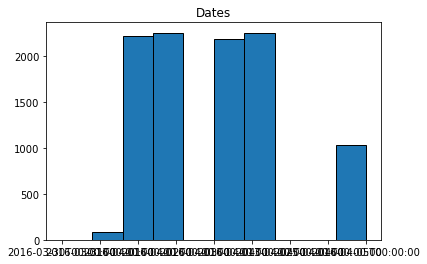

In [26]:
plt.title('Dates')
plt.hist(df['OffenseDate'],edgecolor='black',linewidth=1,orientation='vertical')
plt.show()

In [27]:
'''Analizamos el uso del método to_datetime para modificar 
el formato de hora y fecha correctamente dentro de la 
columna OffenseDate'''

df['OffenseDate'] = pd.to_datetime(df['OffenseDate'])
df

,CrimeId,OriginalCrimeTypeName,OffenseDate,CallTime,Disposition,Address,City,State,AgencyId,AddressType
0,160903280,Assault / Battery,2016-03-30,18:42,REP,100 Block Of Chilton Av,San Francisco,CA,1,Premise Address
1,160912272,Homeless Complaint,2016-03-31,15:31,GOA,2300 Block Of Market St,San Francisco,CA,1,Premise Address
2,160912590,Susp Info,2016-03-31,16:49,GOA,2300 Block Of Market St,San Francisco,CA,1,Premise Address
3,160912801,Report,2016-03-31,17:38,GOA,500 Block Of 7th St,San Francisco,CA,1,Premise Address
4,160912811,594,2016-03-31,17:42,REP,Beale St/bryant St,San Francisco,CA,1,Intersection
...,...,...,...,...,...,...,...,...,...,...
10046,160964210,Well Being Check,2016-04-05,23:38,GOA,Hollister Av/hawes St,San Francisco,CA,1,Intersection
10047,160964216,Traffic Stop,2016-04-05,23:43,ADV,California St/mason St,San Francisco,CA,1,Intersection
10048,160964227,Traffic Stop,2016-04-05,23:48,CIT,Rosella Ct/onondaga Av,San Francisco,CA,1,Intersection
10049,160964229,Passing Call,2016-04-05,23:48,ND,0 Blk Herbst Rd,San Francisco,CA,1,Geo-Override


<AxesSubplot:xlabel='year_month_of_admission'>

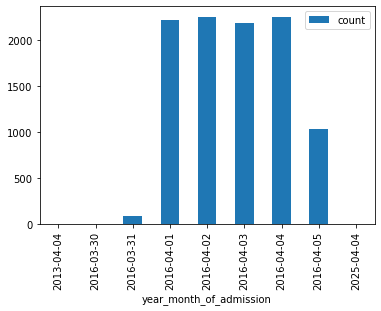

In [29]:
'''Imprimir las veces que se repetieron los datos en los distintos dias.'''
df['year_month_of_admission'] = df['OffenseDate'].map(lambda dt: dt.strftime('%Y-%m-%d'))
grouped_df = df.groupby('year_month_of_admission').size().to_frame("count").reset_index()
grouped_df.plot(kind='bar', x='year_month_of_admission', y='count')